# **SpaceX  Falcon 9 First Stage Landing Prediction**

## Assignment: Exploring and Preparing Data
In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

### Import Libraries and Define Auxiliary Functions

In [ ]:
!pip install numpy pandas seaborn

In [6]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import requests

## Exploratory Data Analysis
First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [7]:
import requests
import pandas as pd
from io import StringIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
data = response.text  # Convertimos la respuesta a texto

# Leemos el CSV desde el texto obtenido
df = pd.read_csv(StringIO(data))
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

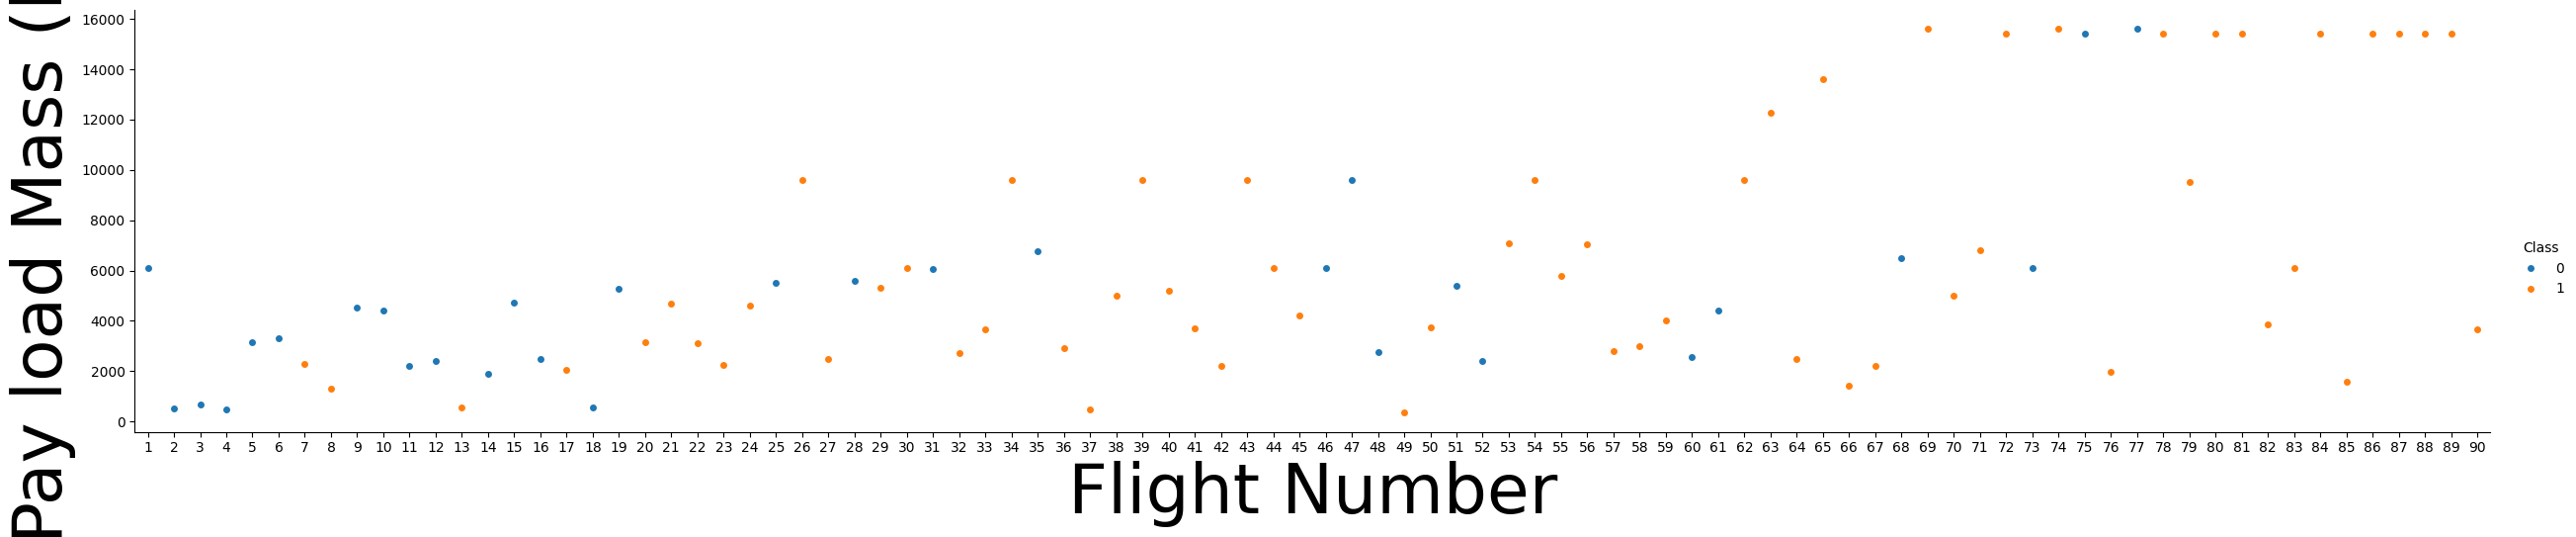

In [10]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=50)
plt.ylabel("Pay load Mass (kg)",fontsize=50)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.

### TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


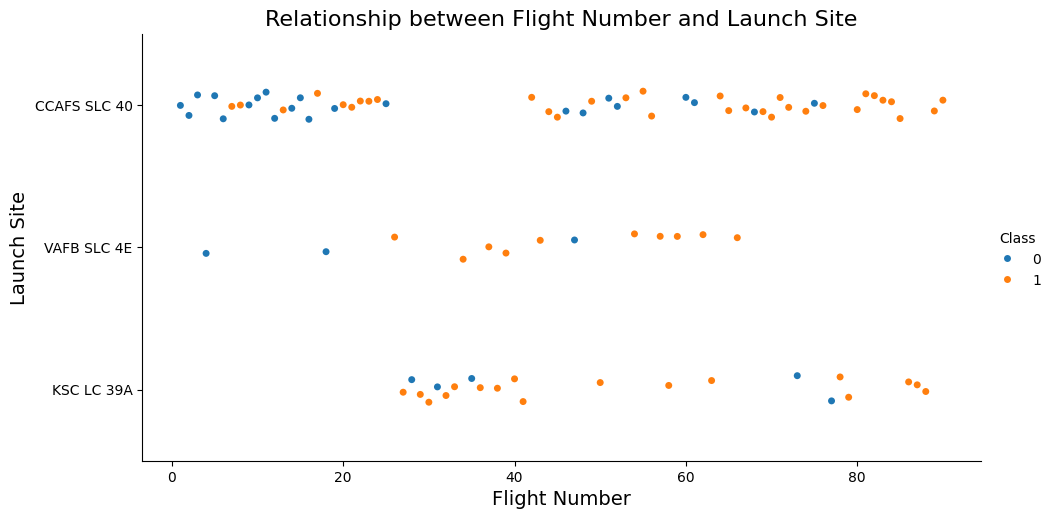

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de catplot
sns.catplot(
    x="FlightNumber",     # Número de vuelo en el eje X
    y="LaunchSite",       # Sitio de lanzamiento en el eje Y
    hue="Class",          # Colorear según la clase
    data=df,             # El DataFrame que contiene los datos
    aspect=2              # Ajustar la proporción del gráfico
)

# Configurar las etiquetas y el título
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Relationship between Flight Number and Launch Site", fontsize=16)
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.

### TASK 2: Visualize the relationship between Payload Mass and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.

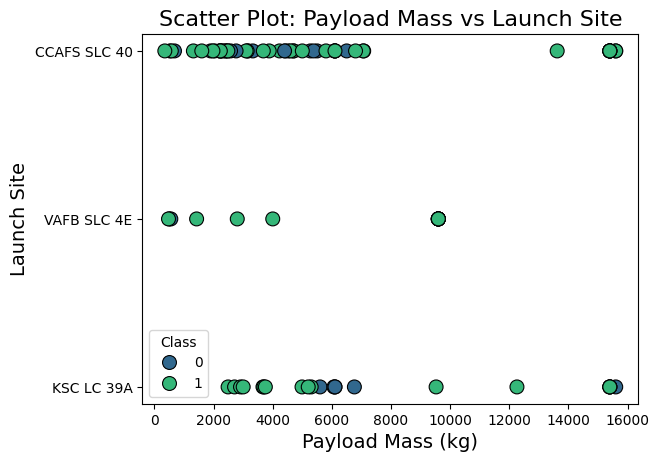

In [13]:
# Crear el gráfico de dispersión
sns.scatterplot(
    x="PayloadMass",      # La carga útil (en kg) en el eje X
    y="LaunchSite",       # El sitio de lanzamiento en el eje Y
    hue="Class",          # Colorear los puntos según la clase
    data=df,             # El DataFrame que contiene los datos
    palette="viridis",    # Paleta de colores para las categorías de "Class"
    s=100,                # Tamaño de los puntos
    edgecolor='black'     # Contorno negro para los puntos
)

# Configurar las etiquetas y el título
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Scatter Plot: Payload Mass vs Launch Site", fontsize=16)

# Mostrar el gráfico
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

C:\Users\Desarrollo05\AppData\Local\Temp\ipykernel_11496\3372011282.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis', hue=None)


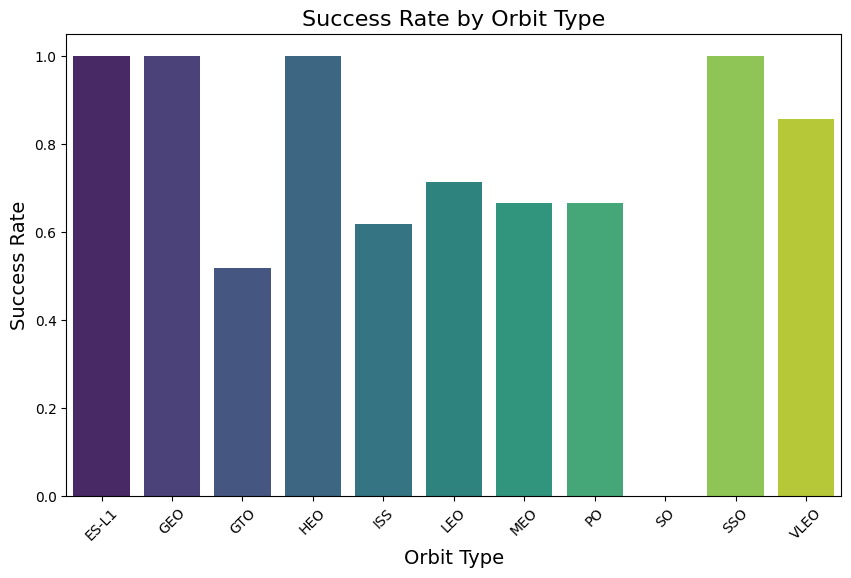

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por tipo de órbita y calcular la tasa de éxito (promedio de la columna 'Class')
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Crear un gráfico de barras con hue=None para evitar la advertencia
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis', hue=None)

# Configurar las etiquetas y el título
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mayor legibilidad

# Mostrar el gráfico
plt.show()


Analyze the plotted bar chart to identify which orbits have the highest success rates.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type
For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

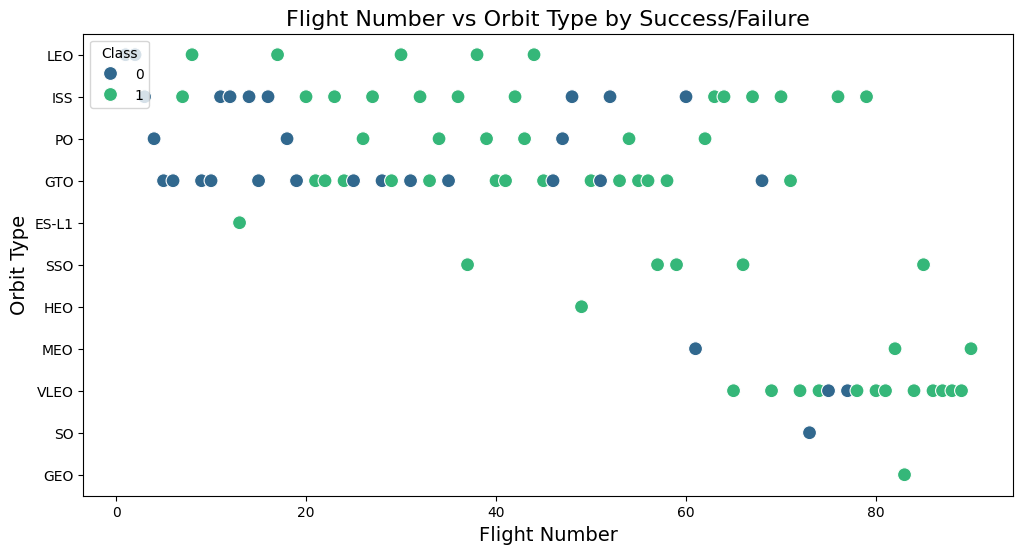

In [18]:
# Crear el gráfico de dispersión
plt.figure(figsize=(12,6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df, palette='viridis', s=100)

# Configurar etiquetas y título
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type by Success/Failure", fontsize=16)

# Mostrar el gráfico
plt.legend(title="Class", loc='upper left')  # Leyenda indicando el significado de los colores
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.

### TASK  5: Visualize the relationship between Payload Mass and Orbit type
Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

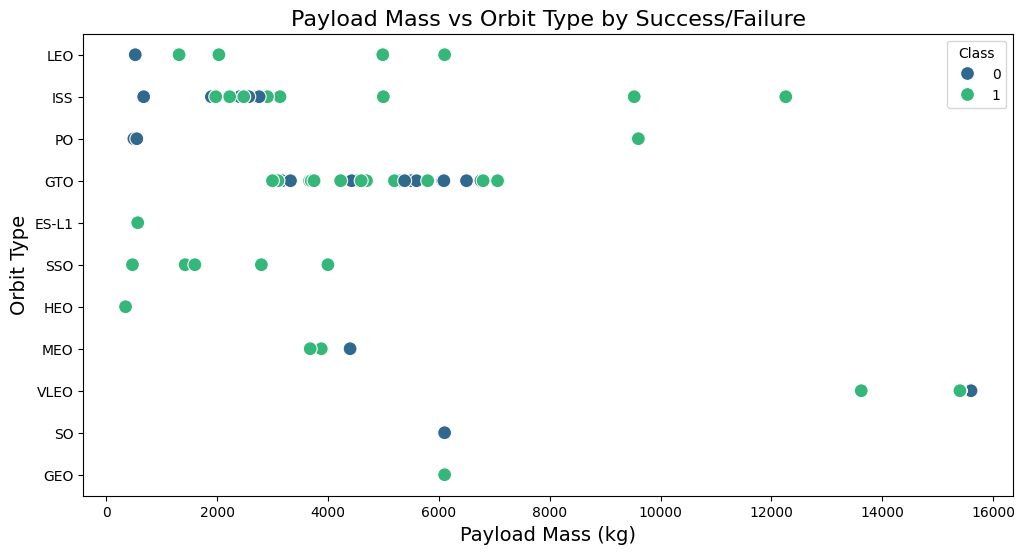

In [19]:
# Crear el gráfico de dispersión
plt.figure(figsize=(12,6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='viridis', s=100)

# Configurar etiquetas y título
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs Orbit Type by Success/Failure", fontsize=16)

# Mostrar el gráfico
plt.legend(title="Class", loc='upper right')  # Leyenda indicando el significado de los colores
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.

### TASK  6: Visualize the launch success yearly trend
You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [21]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


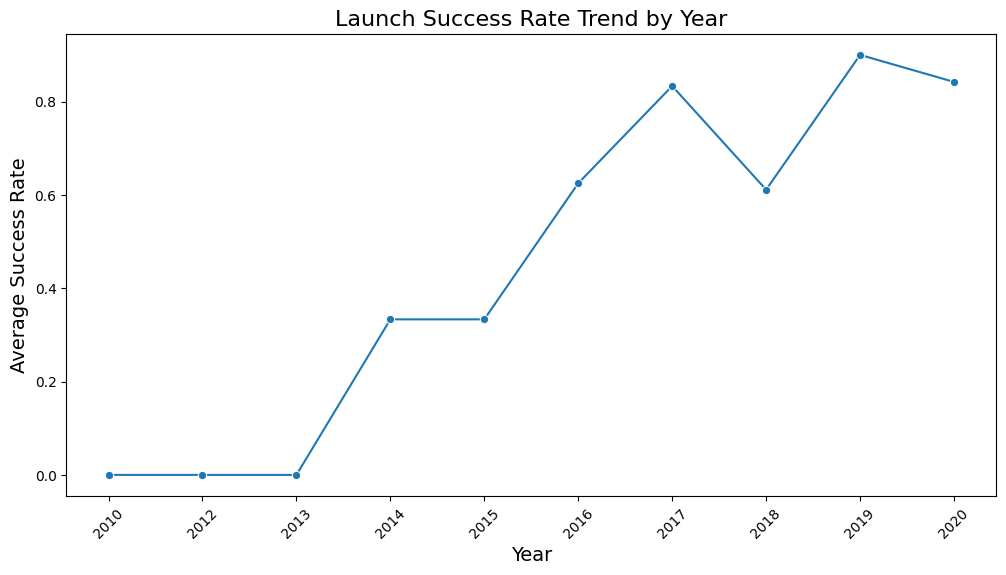

In [22]:
# Función para extraer el año de la columna 'Date'
def Extract_year():
    year = []
    for i in df["Date"]:
        year.append(i.split("-")[0])  # Extrae el primer elemento (año) de la fecha
    return year

# Llamar la función para extraer los años y asignarlo a la columna 'Year'
df['Year'] = Extract_year()

# Convertir la columna 'Class' a valores numéricos para obtener la tasa de éxito (1 para éxito, 0 para fallo)
df['Success'] = df['Class'].apply(lambda x: 1 if x == 1 else 0)

# Calcular la tasa de éxito por año
success_rate_by_year = df.groupby('Year')['Success'].mean().reset_index()

# Graficar la tendencia anual de éxito
plt.figure(figsize=(12,6))
sns.lineplot(data=success_rate_by_year, x='Year', y='Success', marker='o')

# Configurar etiquetas y título
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Launch Success Rate Trend by Year", fontsize=16)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar los valores del eje X para una mejor visualización
plt.show()

## Features Engineering
By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [23]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns
Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [25]:
# HINT: Use get_dummies() function on the categorical columns
# Crear variables ficticias para las columnas categóricas
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)

# Mostrar las primeras filas del dataframe resultante
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`
Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>

In [26]:
# Convertir todas las columnas a tipo 'float64'
features_one_hot = features_one_hot.astype('float64')

# Verificar los primeros registros para asegurarse de que el tipo se ha cambiado correctamente
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

In [29]:
#features_one_hot.to_csv('dataset_part\_3.csv', index=False)